<a href="https://colab.research.google.com/github/adurimurthy/LDIF/blob/main/Backtest_AAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest our first strategy
Install fastquant

It’s as simple as using pip install!

In [ ]:
!pip install fastquant
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get stock data
Import the get_stock_data function from fastquant and use it to pull the stock data of Tata Motors Ltd. (TTM) from January 1, 2009 to January 1, 2019. Notice that we have columns corresponding to the date (dt), and closing price (close).

## “get_stock_data” function
To make the “get_stock_data” function as simple as possible to use, we’ve designed it to only return the closing price of the stock (used for most trading strategies), which follows the format “c” (c = closing price). But, if you want to have more pricing data points (e.g. OHLCV for “open”, “high”, “low”, “close”, “volume”), just set the “format” argument in “get_stock_data” to your desired data format.

In [ ]:
from fastquant import get_stock_data
df_ttm = get_stock_data("TTM", "2010-01-01", "2019-01-01", format="ohlcv")
print(df_ttm.head())

# Note: This format feature should be stable for international stocks listed on Yahoo finance. 
# For symbols from PSE, we recommend sticking to the default “c” format.

[*********************100%***********************]  1 of 1 completed
                 open       high        low      close   volume
dt                                                             
2010-01-04  17.570000  18.090000  17.490000  18.030001  2141700
2010-01-05  17.780001  17.900000  17.620001  17.850000  2022500
2010-01-06  17.900000  18.010000  17.770000  17.990000  2057800
2010-01-07  17.389999  17.629999  17.340000  17.570000  2706800
2010-01-08  17.559999  17.559999  17.370001  17.400000  1967200


In [ ]:
from fastquant import get_stock_data
df_spy = get_stock_data("SPY", "2010-01-01", "2019-01-01", format="ohlcv")
print(df_spy.head())

# Note: This format feature should be stable for international stocks listed on Yahoo finance. 
# For symbols from PSE, we recommend sticking to the default “c” format.

[*********************100%***********************]  1 of 1 completed
                  open        high         low       close     volume
dt                                                                   
2010-01-04  112.370003  113.389999  111.510002  113.330002  118944600
2010-01-05  113.260002  113.680000  112.849998  113.629997  111579900
2010-01-06  113.519997  113.989998  113.430000  113.709999  116074400
2010-01-07  113.500000  114.330002  113.180000  114.190002  131091100
2010-01-08  113.889999  114.620003  113.660004  114.570000  126402800


In [ ]:
from fastquant import get_stock_data
df_aap = get_stock_data("AAP", "2010-01-01", "2019-08-05", format="ohlcv")
print(df_aap.head())
#print(df.tail())
# Note: This format feature should be stable for international stocks listed on Yahoo finance. 
# For symbols from PSE, we recommend sticking to the default “c” format.

[*********************100%***********************]  1 of 1 completed
                 open       high        low      close   volume
dt                                                             
2010-01-04  40.700001  41.040001  40.360001  40.380001  1701700
2010-01-05  40.299999  40.310001  39.720001  40.139999  1932400
2010-01-06  40.049999  40.779999  40.049999  40.490002  1406200
2010-01-07  39.549999  40.540001  39.549999  40.480000  1256800
2010-01-08  40.250000  40.820000  40.110001  40.639999   960300


Text(0.5, 1.0, 'Daily Closing Prices of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05')

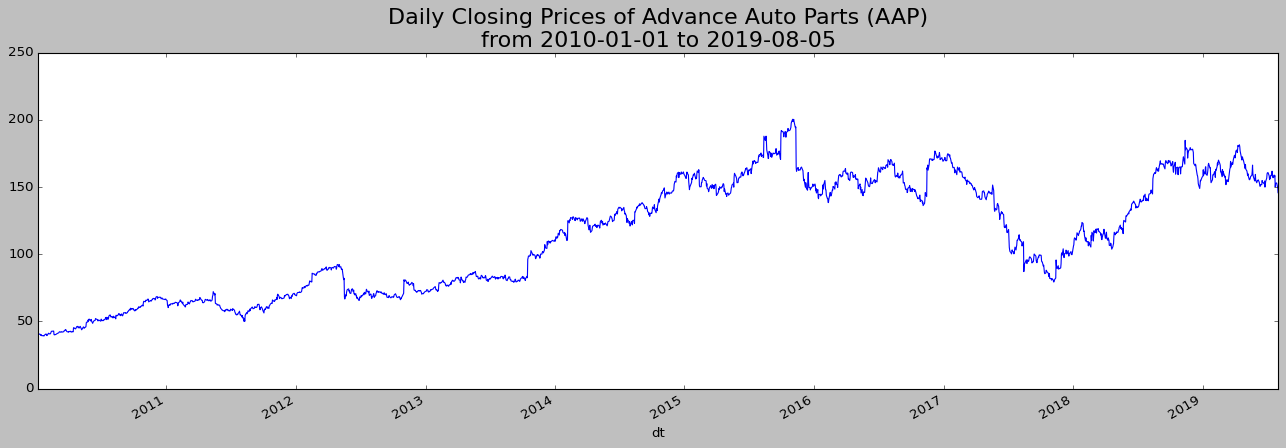

In [ ]:
# Plot daily closing prices
from matplotlib import pyplot as plt

df_aap.close.plot(figsize=(20, 6))
plt.title("Daily Closing Prices of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05", fontsize=20)

Text(0.5, 1.0, 'Daily Closing Prices vs 26 day SMA of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05')

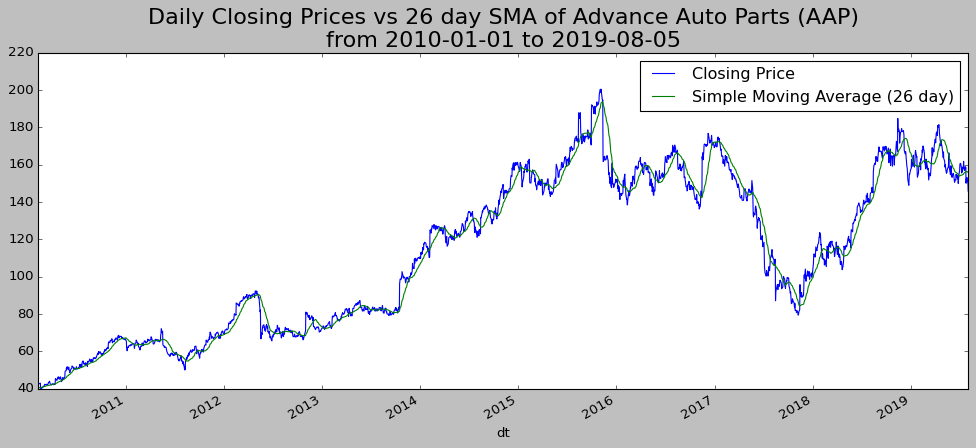

In [ ]:
# Analyze with a simple moving average (SMA) trading strategy
ma26 = df_aap.close.rolling(26).mean()
close_ma26 = pd.concat([df_aap.close, ma26], axis=1).dropna()
close_ma26.columns = ['Closing Price', 'Simple Moving Average (26 day)']

close_ma26.plot(figsize=(15, 6))
plt.title("Daily Closing Prices vs 26 day SMA of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05", fontsize=20)

Text(0.5, 1.0, 'Daily Closing Prices vs 12 day SMA of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05')

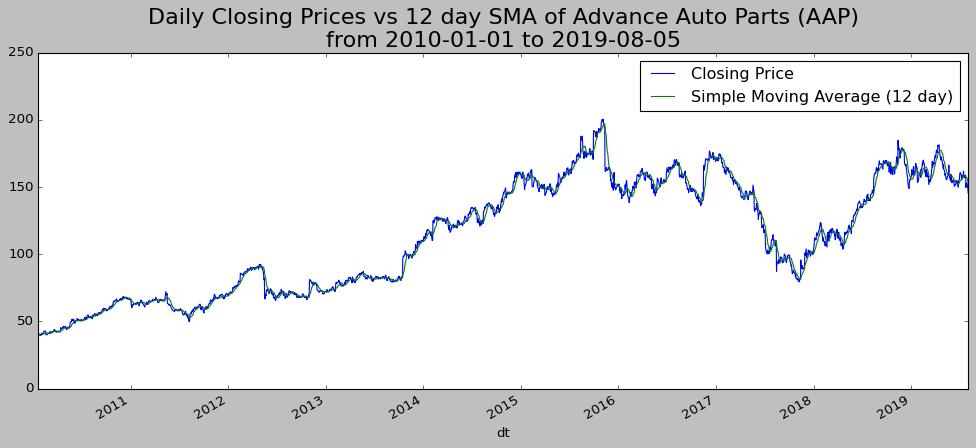

In [ ]:
# Analyze with a simple moving average (SMA) trading strategy
ma12 = df_aap.close.rolling(12).mean()
close_ma12 = pd.concat([df_aap.close, ma12], axis=1).dropna()
close_ma12.columns = ['Closing Price', 'Simple Moving Average (12 day)']

close_ma12.plot(figsize=(15, 6))
plt.title("Daily Closing Prices vs 12 day SMA of Advance Auto Parts (AAP)\nfrom 2010-01-01 to 2019-08-05", fontsize=20)

## “backtest” function
For the “backtest” function, we also assume values for the proportion of your cash you use when you buy (buy_prop) as 1 (100%), the proportion of your stock holding you sell (sell_prop) as 1 (100%), and the commission per transaction (commission) to be 0.75%. You can edit these defaults by setting the values in the arguments in parentheses.

Example below where I backtest Tesla assuming buy_prop = 50%, sell_prop = 50% and commission_per_transaction = 1%.

In [ ]:
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Starting Portfolio Value: 100000.00
2019-08-02T00:00:00, ===Global level arguments===
2019-08-02T00:00:00, init_cash : 100000
2019-08-02T00:00:00, buy_prop : 0.5
2019-08-02T00:00:00, sell_prop : 0.5
2019-08-02T00:00:00, commission : 0.01
2019-08-02T00:00:00, stop_loss : 0
2019-08-02T00:00:00, stop_trail : 0
2019-08-02T00:00:00, take_profit : 0
2019-08-02T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 10
slow_period : 30
2019-08-02T00:00:00, Final Portfolio Value: 101124.36958915713
2019-08-02T00:00:00, Final PnL: 1124.37
Time used (seconds): 2.2750701904296875
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:0.5	sell_prop:0.5	fractional:False	slippage:0.001	single_position:None	commission:0.01	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	s

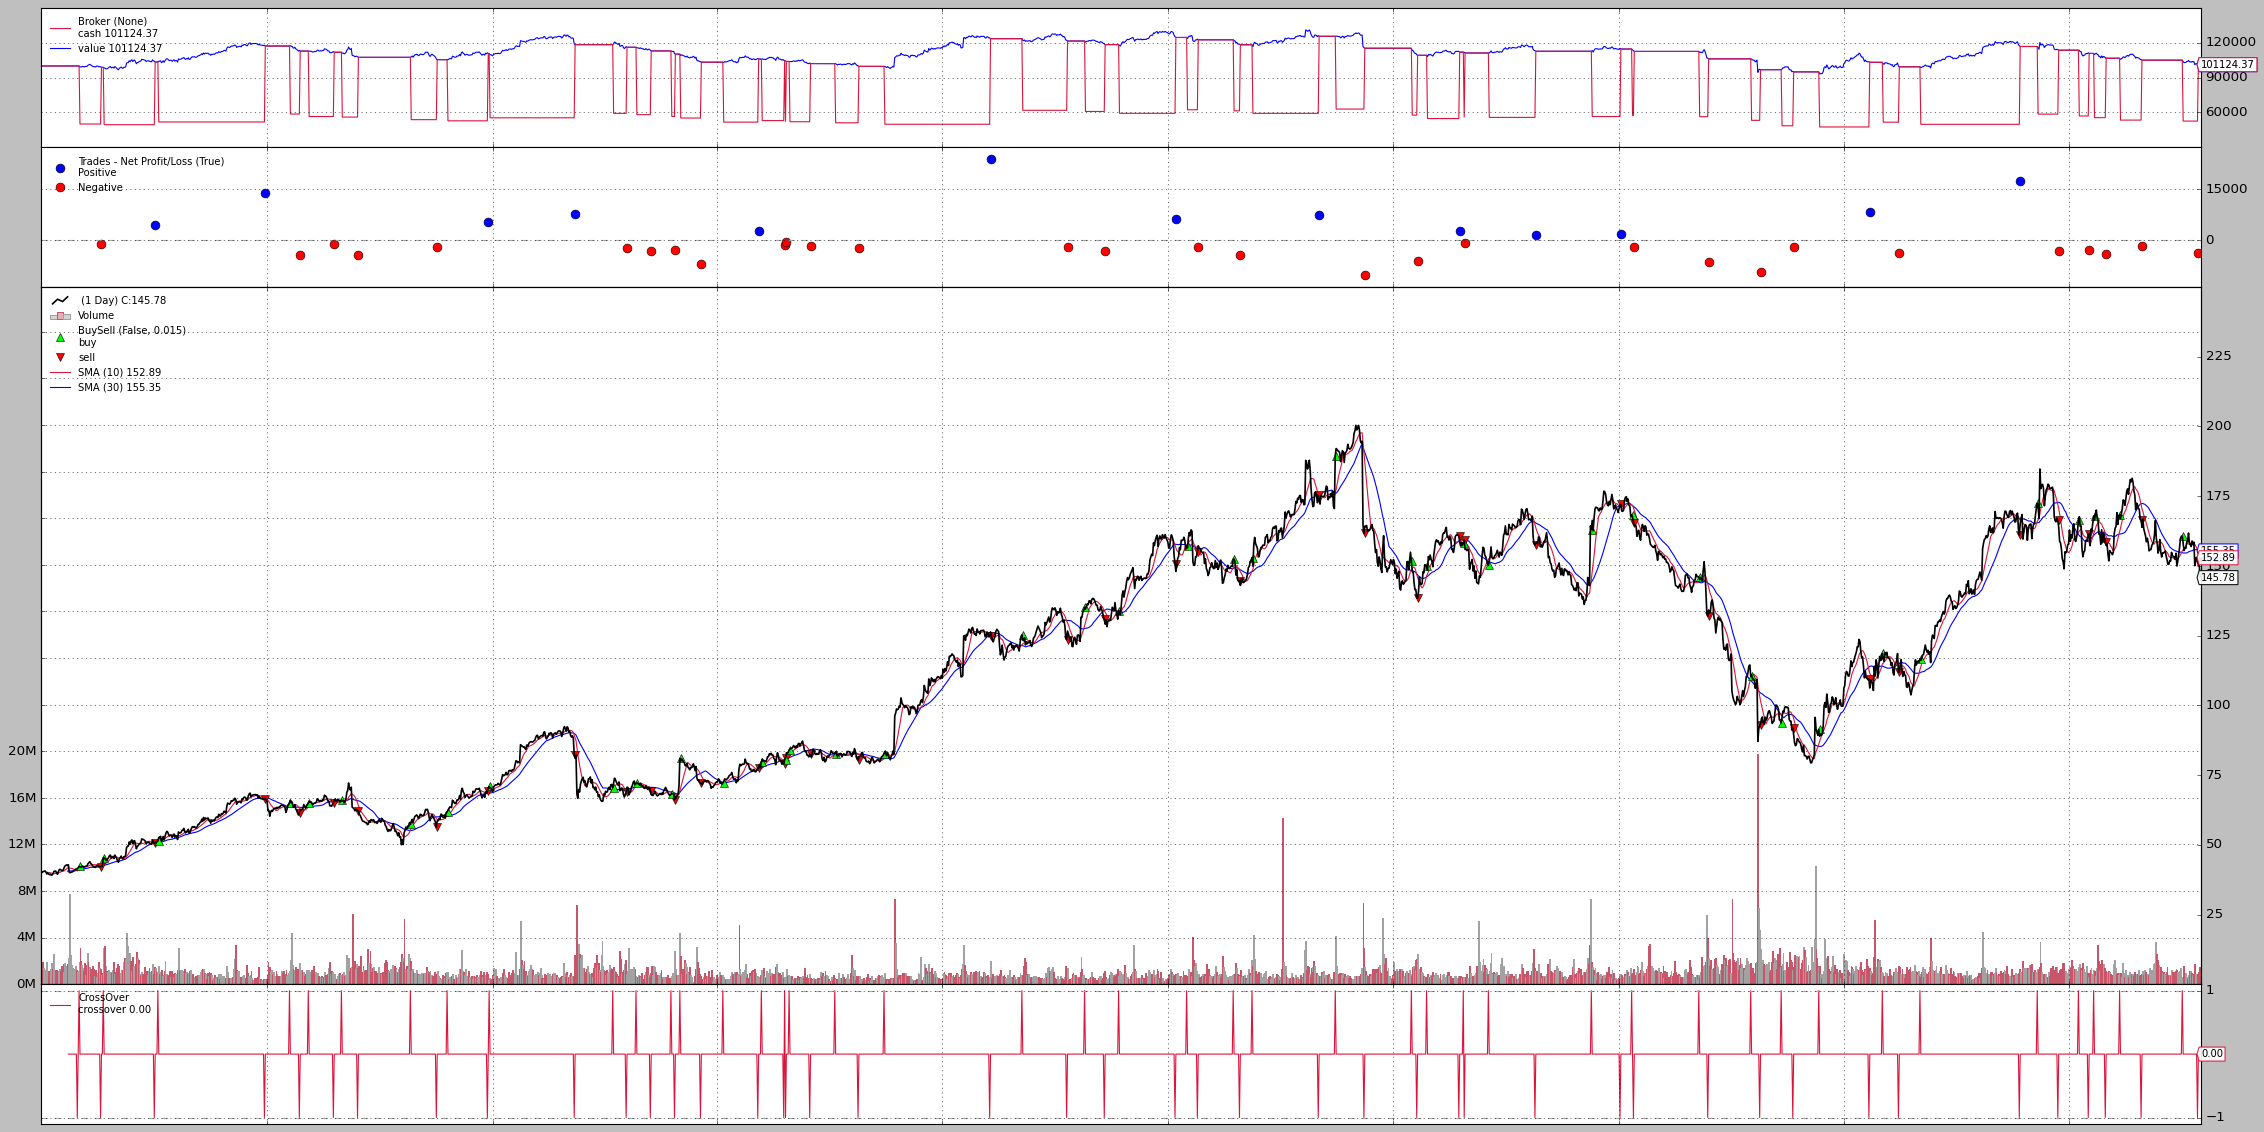

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,0.5,0.5,False,0.001,None,0.01,0,0,...,13,30,7920.74164,7.920742,-3394.842391,-3.394842,23837.437016,23.837437,-10274.831678,-10.274832


In [ ]:
from fastquant import backtest
backtest("smac", df_aap, buy_prop=0.50, sell_prop=0.50, commission=0.01)
#Starting Portfolio Value: 100000.00
#Final Portfolio Value: 80486.21

Backtest your trading strategy
Backtest a simple moving average crossover (SMAC) strategy through the historical stock data of Tata Motors Ltd. (TTM) using the backtest function of fastquant.

In an SMAC strategy, fast period (fast_period) refers to the period used for the fast moving average, while slow period (slow_period) refers to the period used for the slow moving average. When the fast moving average crosses over the slow moving average from below to go above, this is considered a “buy” signal, while if it crosses over from above to go below, this is considered a “sell” signal. For more information on how this works, please check out the explanation in one of my previous articles.

To start out, let’s initialize the fast_period and slow_period as 15, and 40, respectively.

You should see the final portfolio value below at the bottom of the logs. This value can be interpreted as how much money your portfolio would have been worth at the end of the backtesting period (in this case January 1, 2019). If you get the difference between your “Final Portfolio Value” and your “Starting Portfolio Value”, this will be your expected earnings for that same period based on your backtest. (in this case PHP -18026.31)

# Bringing it all together — backtesting in 3 lines of Python
The code below shows how we can perform all the steps above in just 3 lines of python:

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
2019-08-02T00:00:00, ===Global level arguments===
2019-08-02T00:00:00, init_cash : 100000
2019-08-02T00:00:00, buy_prop : 1
2019-08-02T00:00:00, sell_prop : 1
2019-08-02T00:00:00, commission : 0
2019-08-02T00:00:00, stop_loss : 0
2019-08-02T00:00:00, stop_trail : 0
2019-08-02T00:00:00, take_profit : 0
2019-08-02T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 15
slow_period : 40
2019-08-02T00:00:00, Final Portfolio Value: 139493.4629020691
2019-08-02T00:00:00, Final PnL: 39493.46
Time used (seconds): 1.9023082256317139
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	ex

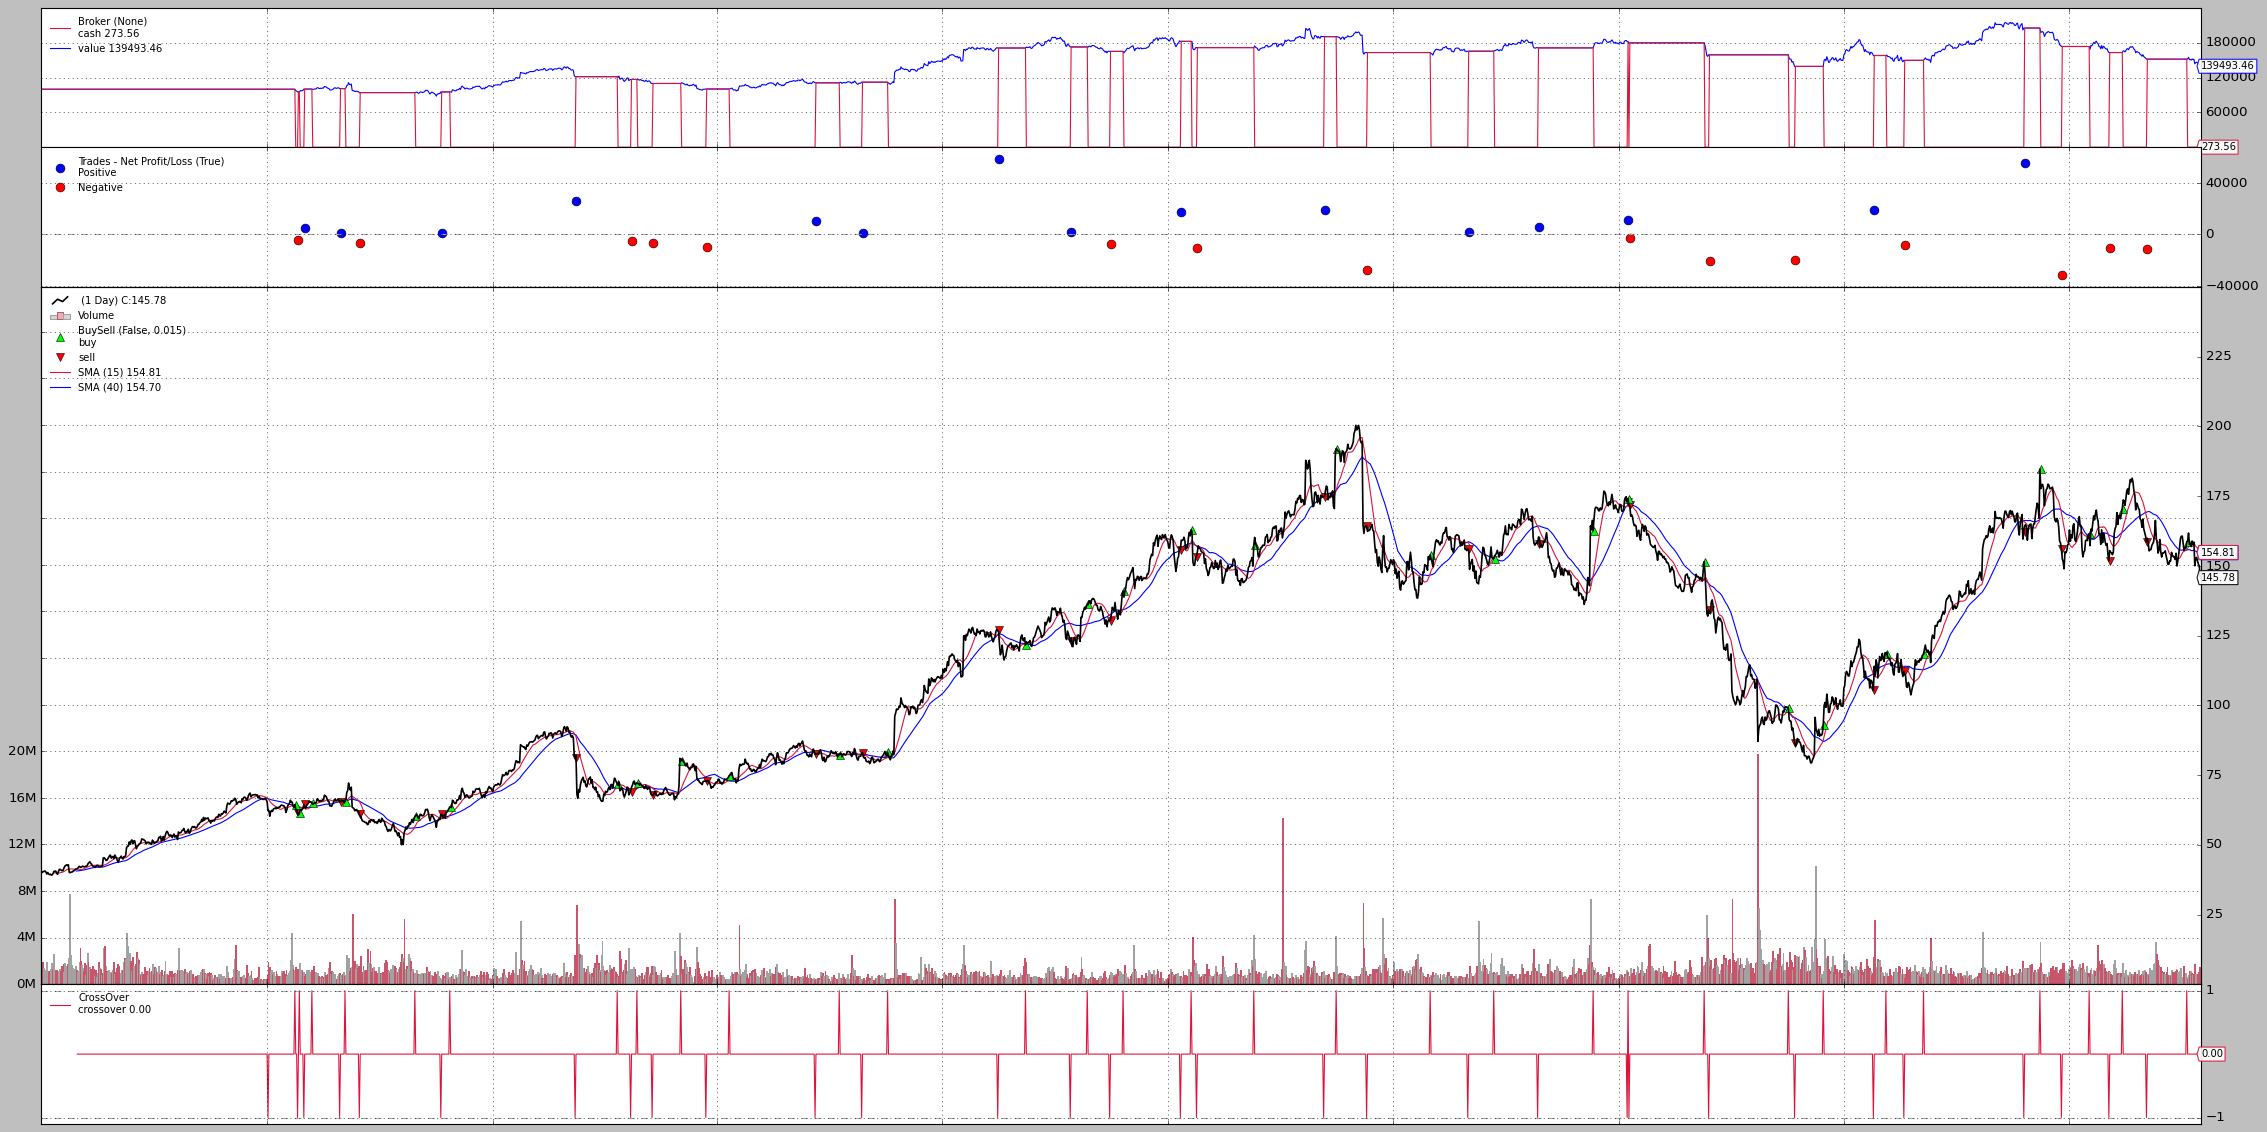

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,15,15,15657.851729,15.657852,-12210.020675,-12.210021,58820.195892,58.820196,-31717.406769,-31.717407


In [ ]:
# Simple Moving Average Crossover (15 day MA vs 40 day MA)

from fastquant import backtest, get_stock_data

df_aap = get_stock_data("AAP", "2010-01-01", "2019-08-05")
backtest('smac', df_aap, fast_period=15, slow_period=40)

# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 81973.69

# Improve our SMAC strategy
## Increase both the fast period and the slow period
This shows how small changes can quickly turn a loosing strategy into a winnig one. Our final portfolio value went up from PHP 81,973 to PHP 100,896 (PHP 18,923 increase), after increasing both fast_period, and slow_period to 30, and 50, respectively.

Starting Portfolio Value: 100000.00
2019-08-02T00:00:00, ===Global level arguments===
2019-08-02T00:00:00, init_cash : 100000
2019-08-02T00:00:00, buy_prop : 1
2019-08-02T00:00:00, sell_prop : 1
2019-08-02T00:00:00, commission : 0
2019-08-02T00:00:00, stop_loss : 0
2019-08-02T00:00:00, stop_trail : 0
2019-08-02T00:00:00, take_profit : 0
2019-08-02T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 12
slow_period : 26
2019-08-02T00:00:00, Final Portfolio Value: 221472.92211532593
2019-08-02T00:00:00, Final PnL: 121472.92
Time used (seconds): 1.528223991394043
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	

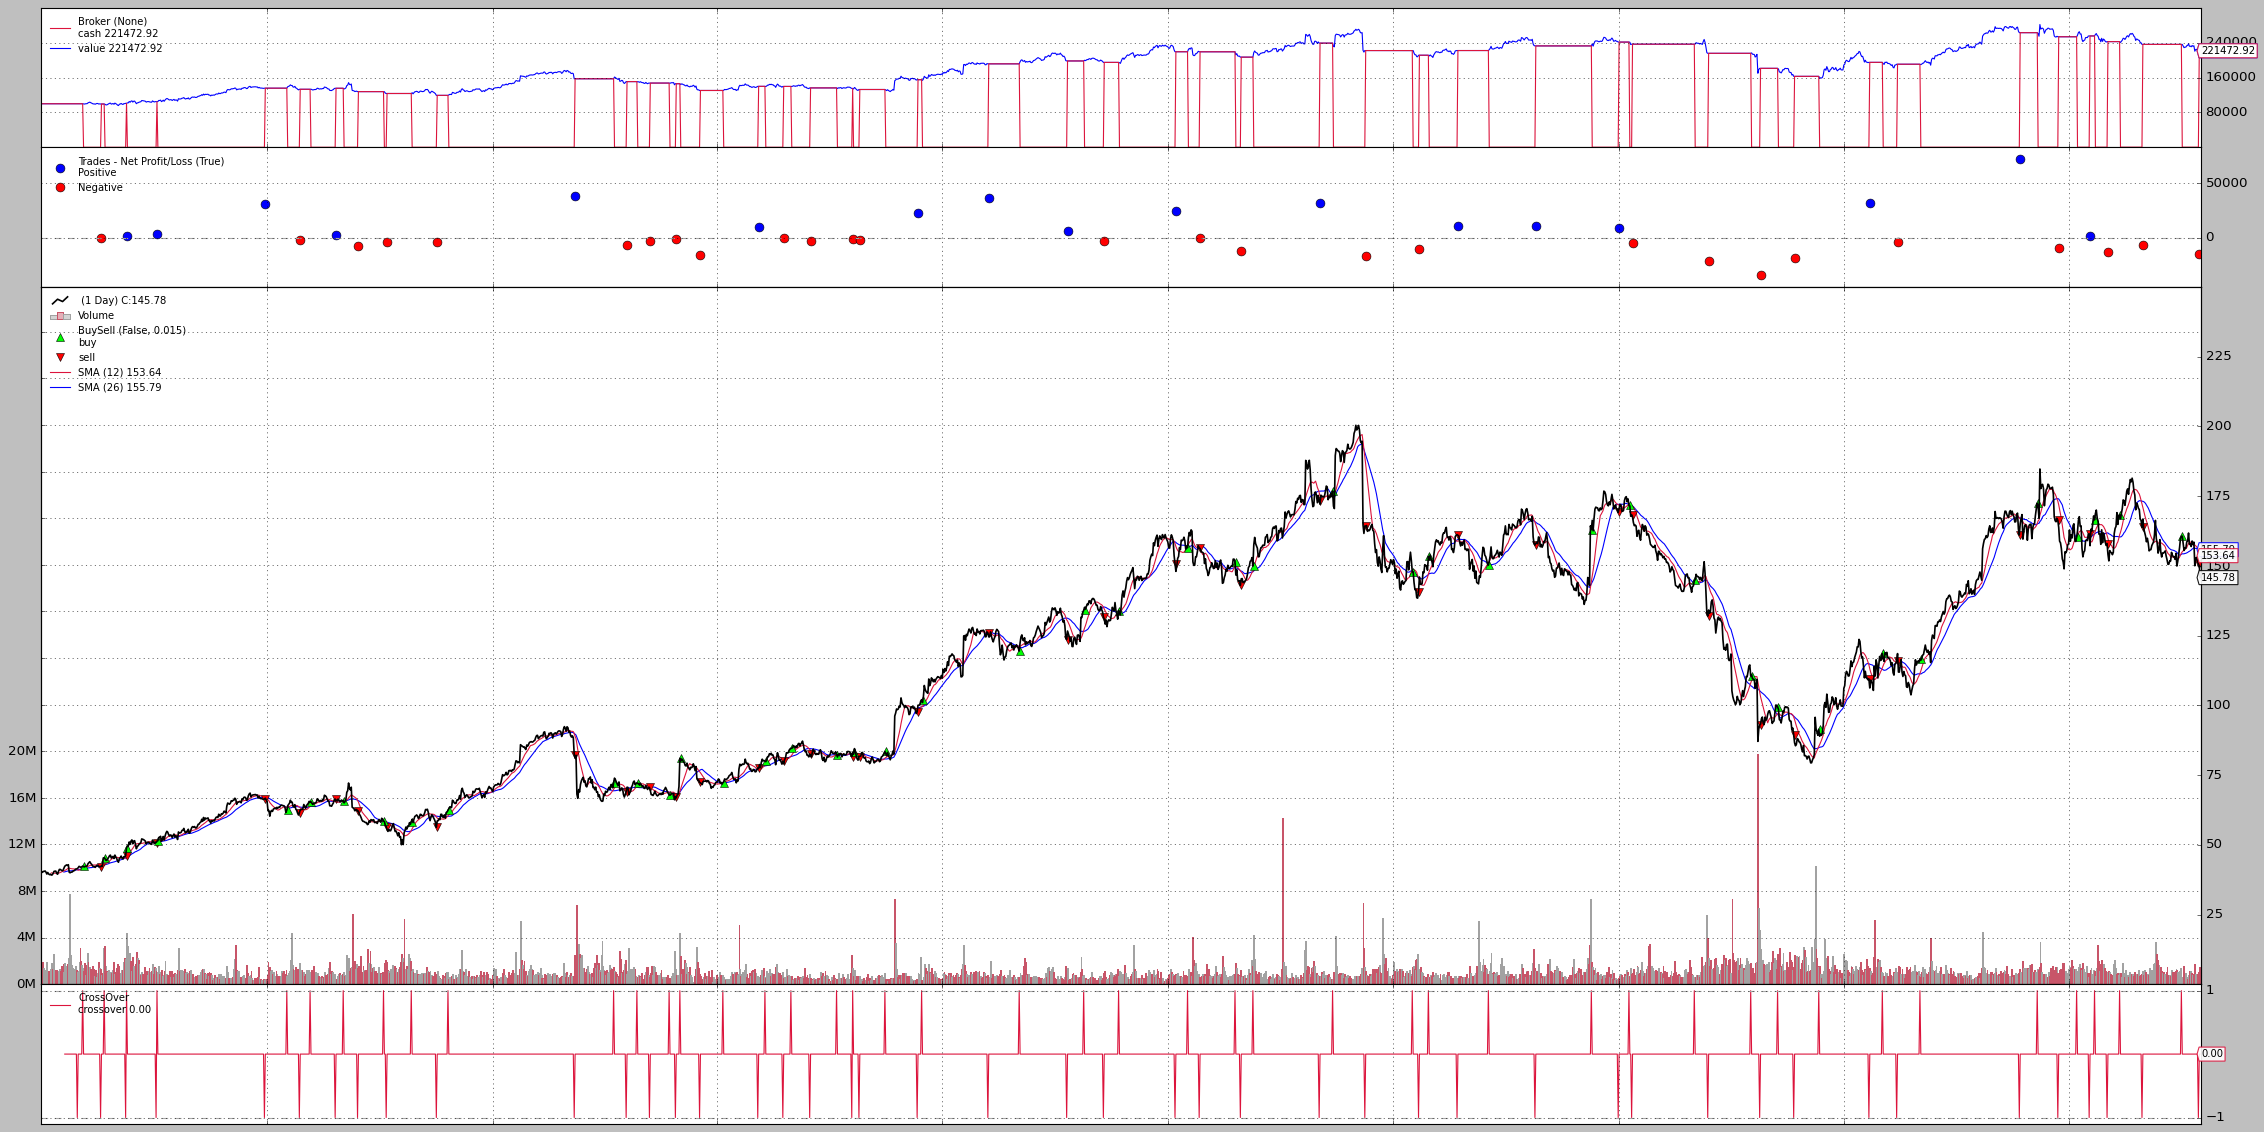

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,17,27,20283.02298,20.283023,-8271.795131,-8.271795,72411.832031,72.411832,-34458.320595,-34.458321


In [ ]:
backtest('smac', df_aap, fast_period=12, slow_period=26)
# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 100896.27

Decrease the slow period while keeping the fast period the same
In this case, the performance of our strategy actually not improved! Our final portfolio value went down from PHP 100,896 to PHP 81,400 (PHP 19,496 decrease), after decreasing the slow period to 35, and keeping the fast period the same at 15.

Starting Portfolio Value: 100000.00
2019-08-02T00:00:00, ===Global level arguments===
2019-08-02T00:00:00, init_cash : 100000
2019-08-02T00:00:00, buy_prop : 1
2019-08-02T00:00:00, sell_prop : 1
2019-08-02T00:00:00, commission : 0
2019-08-02T00:00:00, stop_loss : 0
2019-08-02T00:00:00, stop_trail : 0
2019-08-02T00:00:00, take_profit : 0
2019-08-02T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 15
slow_period : 35
2019-08-02T00:00:00, Final Portfolio Value: 140045.9376220703
2019-08-02T00:00:00, Final PnL: 40045.94
Time used (seconds): 1.4826204776763916
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	a

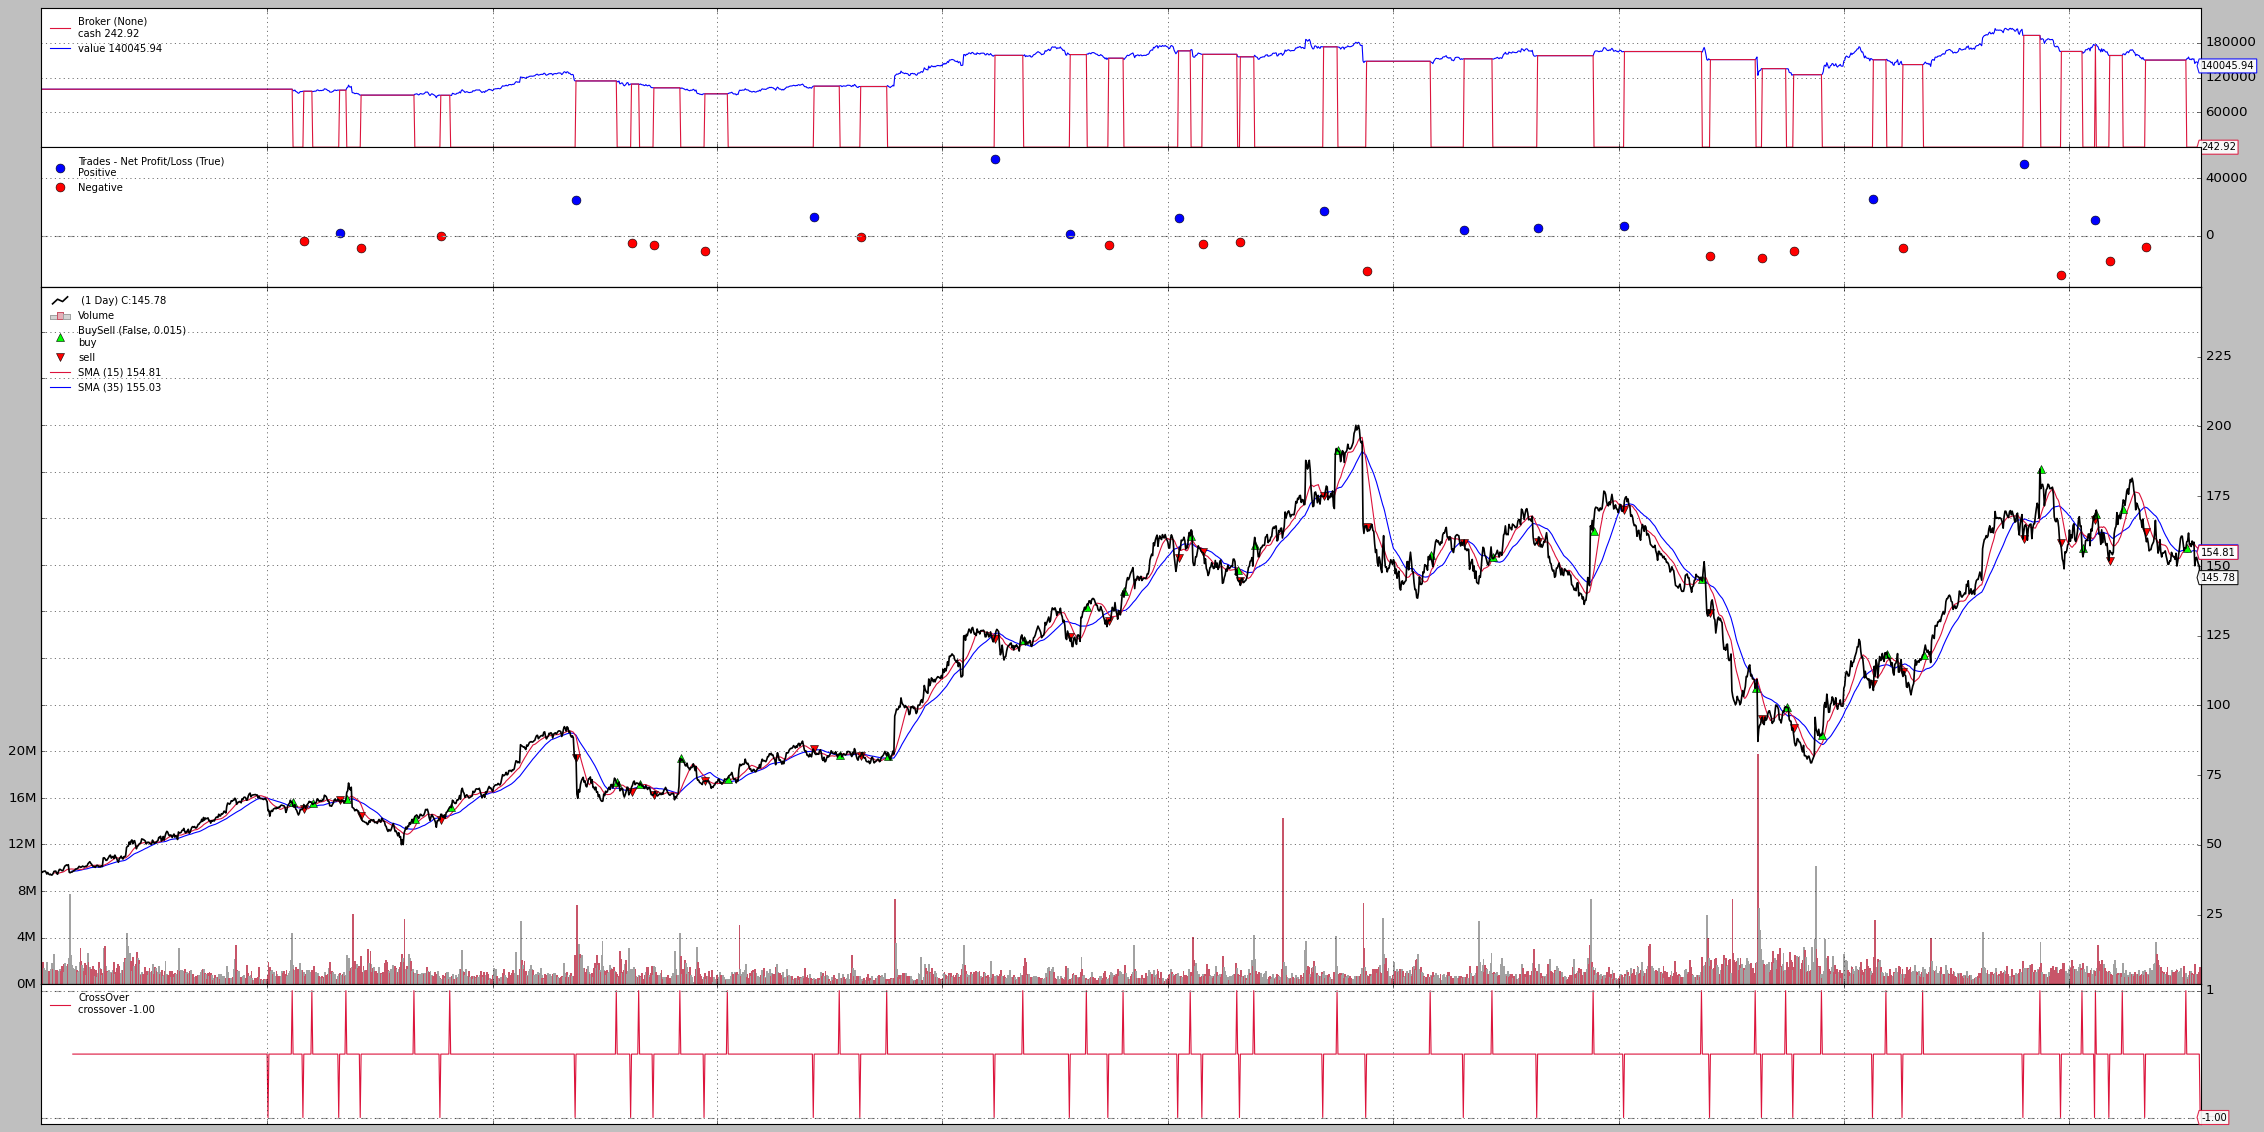

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,13,18,17517.822986,17.517823,-9867.037582,-9.867038,53579.237274,53.579237,-27565.675552,-27.565676


In [ ]:
backtest('smac', df_aap, fast_period=15, slow_period=35)
# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 81399.96

Text(0.5, 1.0, 'Daily Closing Prices of Tata Motors (TTM)\nfrom 2010-01-01 to 2019-08-05')

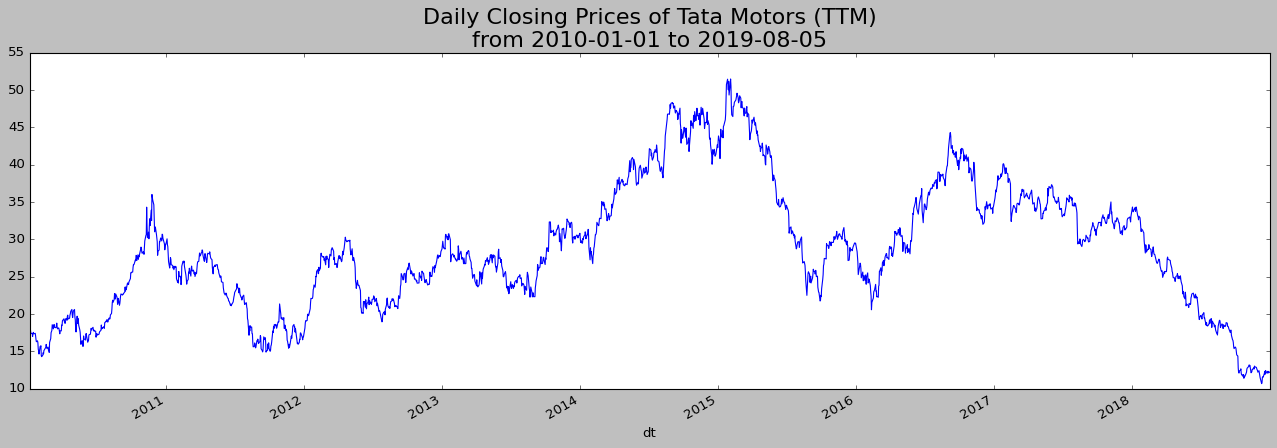

In [ ]:
# Plot daily closing prices
from matplotlib import pyplot as plt

df_ttm.close.plot(figsize=(20, 6))
plt.title("Daily Closing Prices of Tata Motors (TTM)\nfrom 2010-01-01 to 2019-08-05", fontsize=20)

Text(0.5, 1.0, 'Daily Closing Prices of S&P 500 (SPY)\nfrom 2010-01-01 to 2019-08-05')

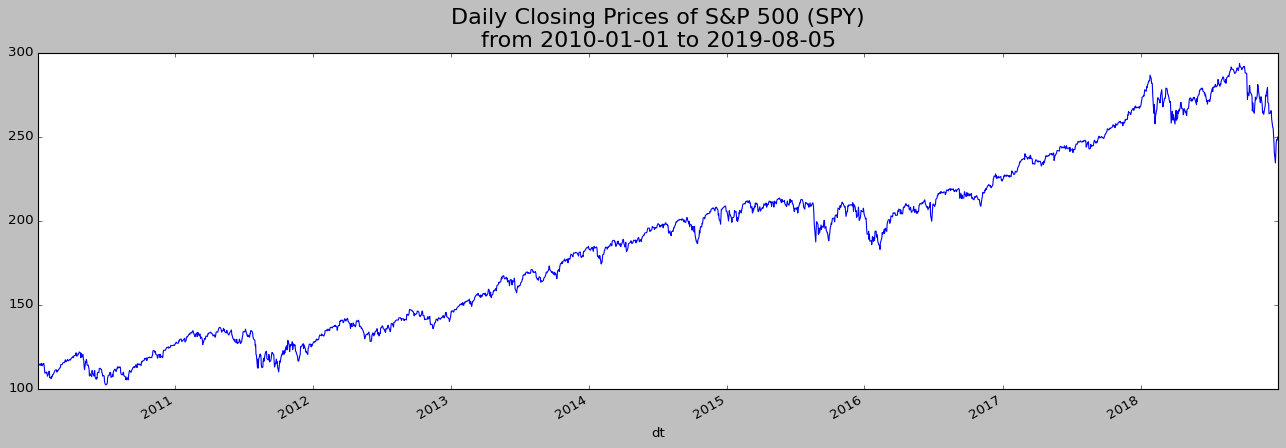

In [ ]:
# Plot daily closing prices
from matplotlib import pyplot as plt

df_spy.close.plot(figsize=(20, 6))
plt.title("Daily Closing Prices of S&P 500 (SPY)\nfrom 2010-01-01 to 2019-08-05", fontsize=20)

Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 12
slow_period : 26
2018-12-31T00:00:00, Final Portfolio Value: 124588.29189300537
2018-12-31T00:00:00, Final PnL: 24588.29
Time used (seconds): 1.4563777446746826
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	

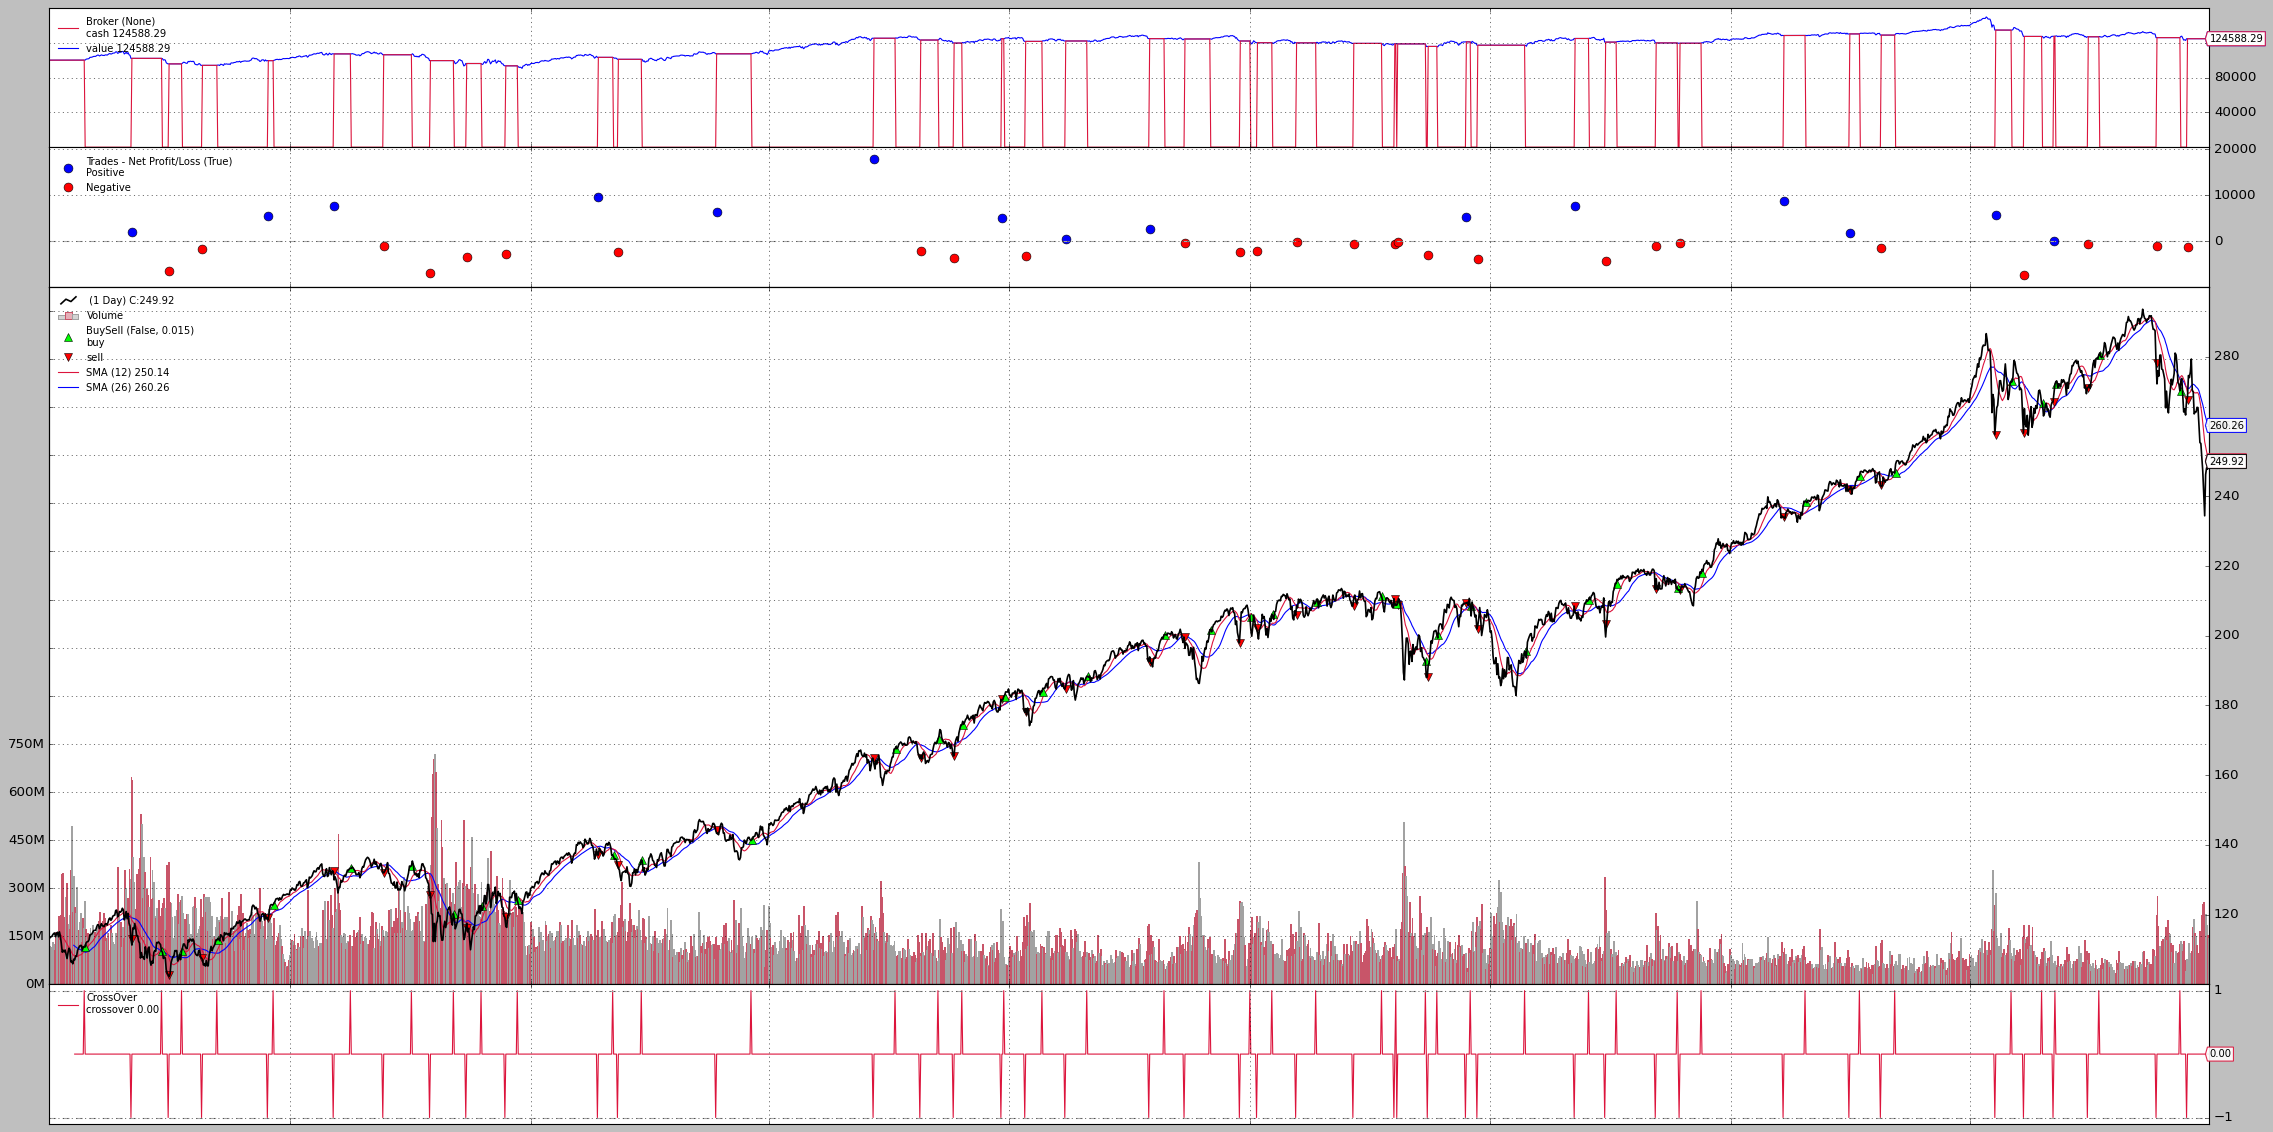

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,15,27,5785.290605,5.785291,-2303.372858,-2.303373,17850.902313,17.850902,-7296.368408,-7.296368


In [ ]:
backtest('smac', df_spy, fast_period=12, slow_period=26)
# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 100896.27

Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 12
slow_period : 26
2018-12-31T00:00:00, Final Portfolio Value: 158388.0743560791
2018-12-31T00:00:00, Final PnL: 58388.07
Time used (seconds): 1.4708998203277588
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	a

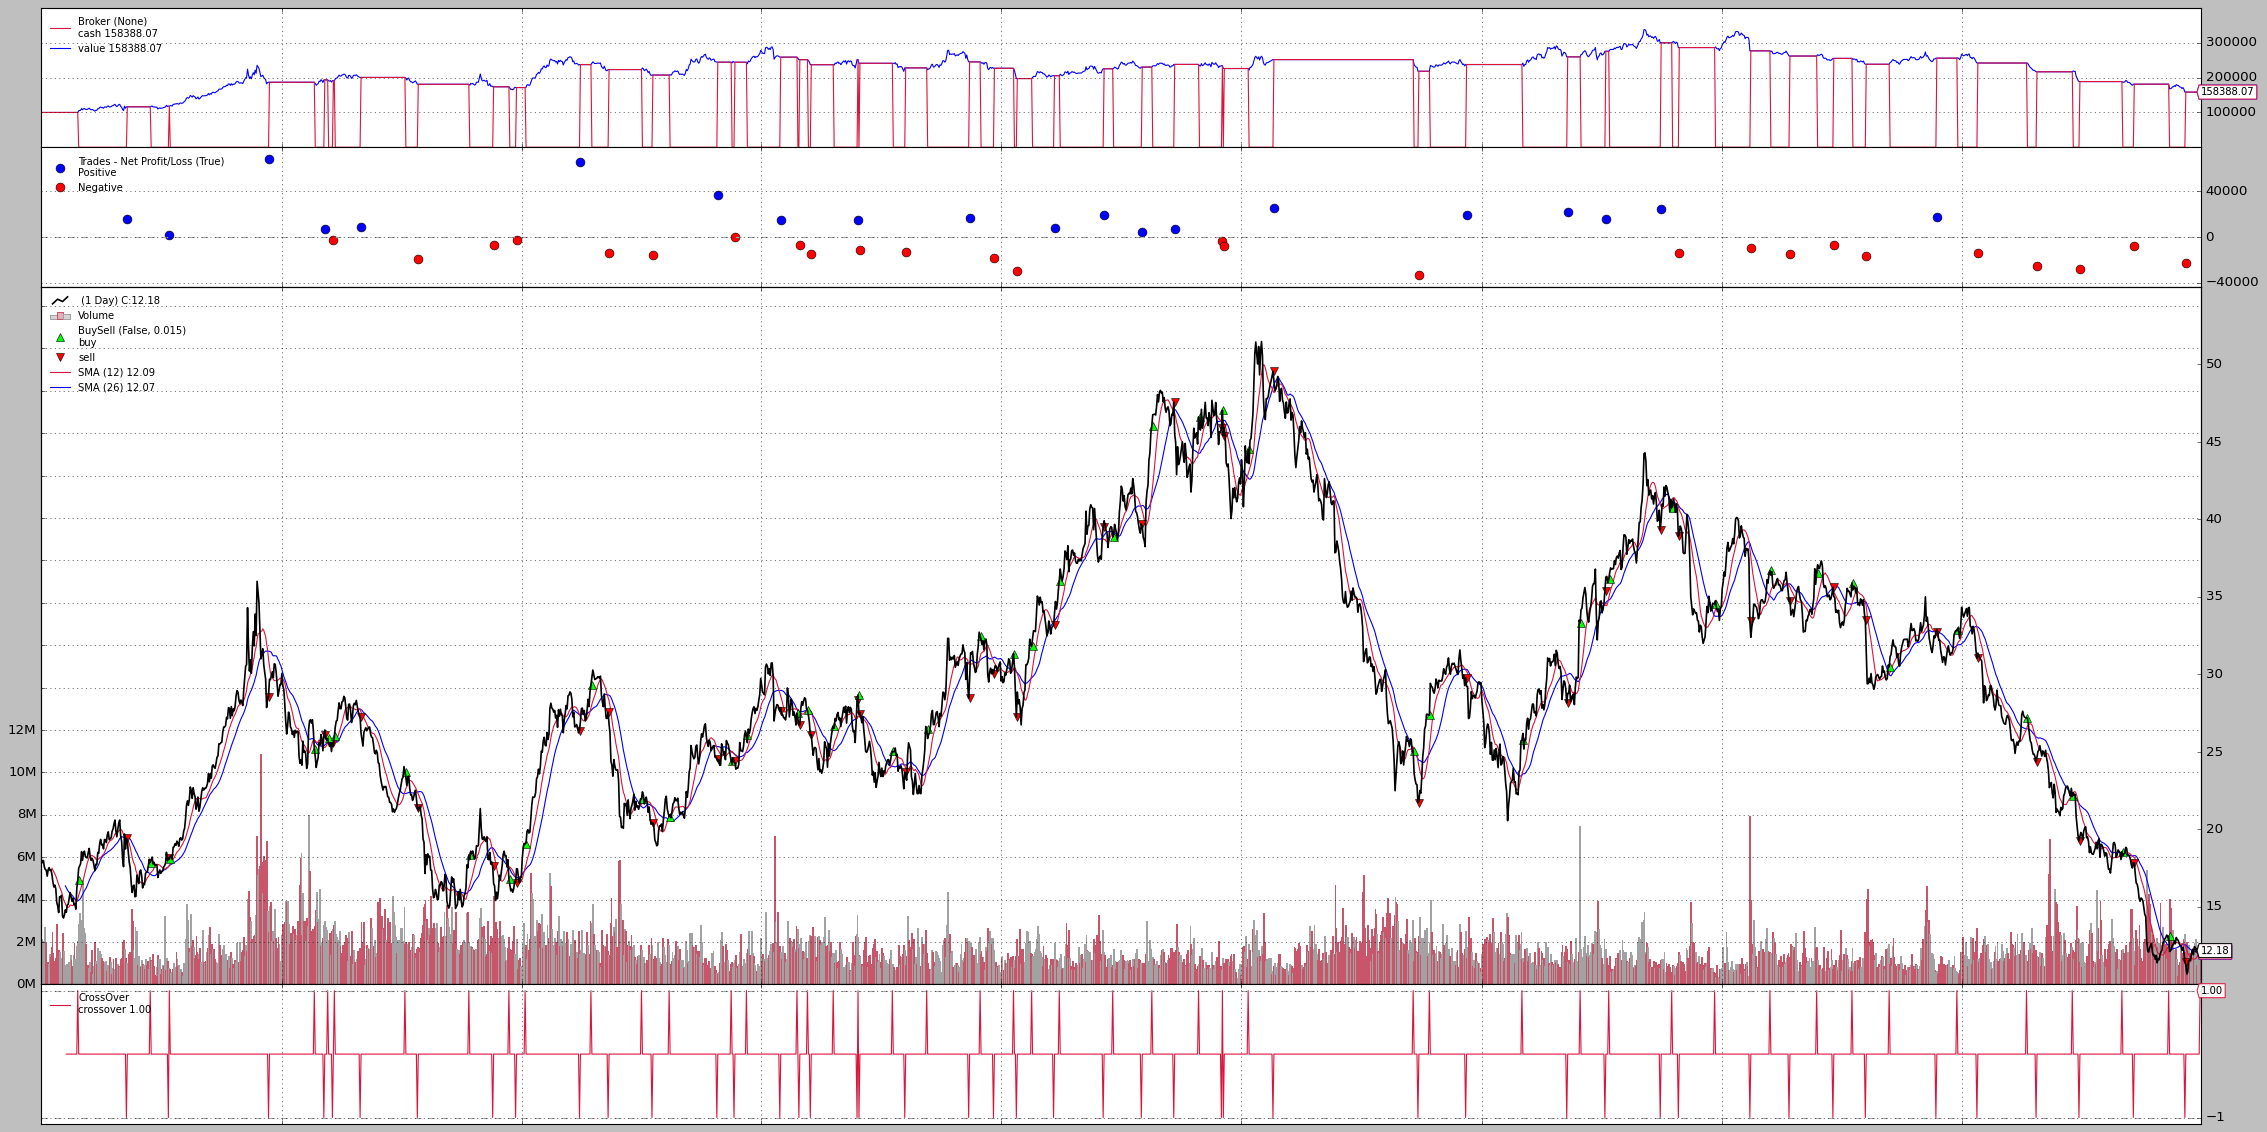

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,20,26,20869.711781,20.869712,-13807.929279,-13.807929,68520.678505,68.520679,-33396.569235,-33.396569


In [ ]:
backtest('smac', df_ttm, fast_period=12, slow_period=26)
# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 100896.27